<h1 style="background-color:#EBF5FB; color:#2471A3;">Library imports</h1>

In [244]:
# Data Manipulation and processing
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# ML
import mlflow
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

<h1 style="background-color:#EBF5FB; color:#2471A3;">Initial split to test and train sets</h1>

In [245]:
# Load the dataset
df = pd.read_csv('./breast-cancer.csv')

In [246]:
# Check for duplicates
print(df.duplicated().any())

False


In [247]:
# Split to train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

print(f'Train set dimensions: {train.shape}')
print(f'Test set dimensions: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Train set dimensions: (455, 32)
Test set dimensions: (114, 32)


<p style="background-color:#FDEBD0;"><b>Comment: </b>The dataset sample size is small in comparison to its dimensionality.</p>

<h1 style="background-color:#EBF5FB; color:#2471A3;">Dataset exploration</h1>

In [248]:
# Load the train set
df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

<p style="background-color:#FDEBD0;"><b>Comment: </b>32 features in total, each contains 569 data points.The dataset features consist of 10 distinct tumor measurement categories, each measured in three variations: mean, standard error (se), and worst.</p>

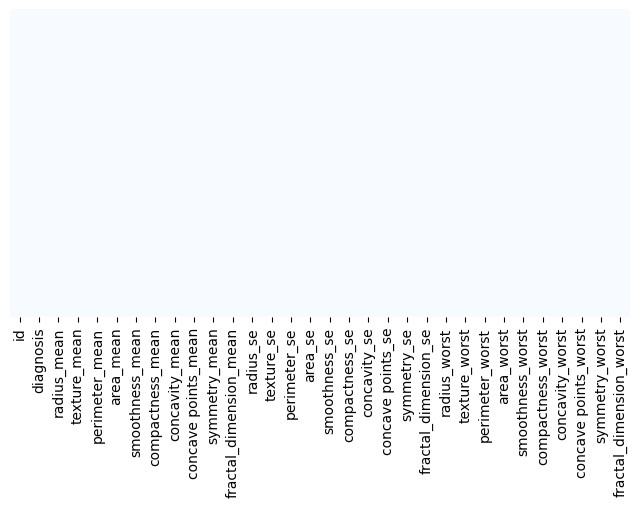

In [250]:
# Check for missing data
plt.figure(figsize=(8, 4)) 
sns.heatmap(df.isnull(), yticklabels = False, xticklabels=True, cbar=False, cmap='Blues')
plt.show()

<p style="background-color:#FDEBD0;"><b>Comment: </b>There are no missing values.</p>

In [251]:
#  Preview the full dataset
pd.set_option('display.max_columns', None)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
84,88350402,B,13.640,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,0.3242,0.6612,1.996,27.19,0.006470,0.01248,0.018100,0.011030,0.01898,0.001794,14.85,19.05,94.11,683.4,0.12780,0.1291,0.15330,0.09222,0.2530,0.06510
53,90524101,M,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.025090,0.014800,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.14820,0.3735,0.33010,0.19740,0.3060,0.08503
142,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.064460,0.022520,0.03672,0.004394,18.07,19.08,125.10,980.9,0.13900,0.5954,0.63050,0.23930,0.4667,0.09946
356,9013579,B,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0.1689,1.1500,1.400,14.91,0.004942,0.01203,0.007508,0.005179,0.01442,0.001684,14.69,35.63,97.11,680.6,0.11080,0.1457,0.07934,0.05781,0.2694,0.07061
371,918465,B,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,0.2513,0.5040,1.714,18.54,0.007327,0.01153,0.017980,0.007986,0.01962,0.002234,13.45,15.77,86.92,549.9,0.15210,0.1632,0.16220,0.07393,0.2781,0.08052
241,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.4520,8.419,101.90,0.010000,0.03480,0.065770,0.028010,0.05168,0.002887,18.55,21.43,121.40,971.4,0.14110,0.2164,0.33550,0.16670,0.3414,0.07147
213,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,0.8811,1.7700,4.360,77.11,0.007762,0.10640,0.099600,0.027710,0.04077,0.022860,15.77,22.13,101.70,767.3,0.09983,0.2472,0.22200,0.10210,0.2272,0.08799
251,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,0.2498,1.2160,1.976,15.24,0.008732,0.02042,0.010620,0.006801,0.01824,0.003494,11.24,22.99,74.32,376.5,0.14190,0.2243,0.08434,0.06528,0.2502,0.09209
407,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.057300,0.020300,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.6076,0.64760,0.28670,0.2355,0.10510
264,8910499,B,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,0.3380,1.9160,2.591,26.76,0.005436,0.02406,0.030990,0.009919,0.02030,0.003009,14.80,30.04,97.66,661.5,0.10050,0.1730,0.14530,0.06189,0.2446,0.07024


In [252]:
# Drop uninformative features
df.drop(['id'], axis=1, inplace=True)

In [253]:
# Explore target feature levels
df['diagnosis'].unique()

array(['B', 'M'], dtype=object)

<h1 style="background-color:#EBF5FB; color:#2471A3;">Feature engineering</h1>

In [254]:
# Recode target variable to numerical
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)


In [255]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
316,1,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.873,43.95,0.004714,0.02015,0.03697,0.011100,0.01237,0.002556,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
399,1,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.012410,0.01575,0.002747,33.12,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.26880,0.2856,0.08082
169,0,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.01097,0.01651,0.011210,0.01953,0.003100,13.06,18.16,84.16,516.4,0.14600,0.1115,0.1087,0.07864,0.2765,0.07806
425,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,0.1781,1.6870,1.243,11.28,0.006588,0.01270,0.01450,0.006104,0.01574,0.002268,10.67,36.92,68.03,349.9,0.11100,0.1109,0.0719,0.04866,0.2321,0.07211
294,0,11.870,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,0.2560,1.5540,1.955,20.24,0.006854,0.06063,0.06663,0.015530,0.02354,0.008925,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952


In [256]:
# Check for imbalance of the target feature
benign = len(df[df['diagnosis'] == 0])
malignant = len(df[df['diagnosis'] == 1])
percent = round(malignant * 100 / (malignant + benign), 2)
print(f'Benign: {benign}, Malignant: {malignant}')
print(f'The percentage of patients with a malignant tumor: {percent}%')

Benign: 290, Malignant: 165
The percentage of patients with a malignant tumor: 36.26%


<p style="background-color:#FDEBD0;"><b>Comment: </b>The dataset exhibits a moderate class imbalance with 37.26% of tumors being malignant, which is not extreme but may require consideration to ensure balanced model performance.</p>

<h1 style="background-color:#EBF5FB; color:#2471A3;">Preprocessing</h1>

In [257]:
# Check data distributions and outliers
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.362637,14.112499,19.152879,91.818286,653.819121,0.096413,0.103319,0.087485,0.048690,0.180939,0.062668,0.402524,1.209881,2.825247,40.285618,0.007003,0.025063,0.031473,0.011646,0.020525,0.003710,16.256097,25.538747,107.031407,881.189890,0.132459,0.251862,0.267491,0.114448,0.290416,0.083491
std,0.481291,3.535375,4.158963,24.313012,358.166179,0.013799,0.050490,0.077802,0.038597,0.027398,0.006819,0.284371,0.541961,2.037754,47.730421,0.002844,0.017510,0.031106,0.005897,0.008196,0.002610,4.890553,6.100631,33.869187,586.395654,0.022626,0.153109,0.199638,0.065321,0.062992,0.017814
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.685000,16.070000,75.100000,418.500000,0.086650,0.066160,0.029950,0.020720,0.161850,0.057885,0.232050,0.832400,1.594000,17.740000,0.005163,0.013050,0.015215,0.007691,0.015015,0.002208,13.020000,21.005000,84.135000,514.650000,0.116400,0.147750,0.116550,0.064955,0.249400,0.071365
50%,0.000000,13.280000,18.750000,85.980000,541.800000,0.095940,0.092280,0.060150,0.033410,0.179200,0.061540,0.314700,1.127000,2.222000,23.560000,0.006369,0.020250,0.025440,0.010780,0.018720,0.003071,14.850000,25.210000,97.110000,675.200000,0.131600,0.211800,0.228200,0.098610,0.281500,0.079610
75%,1.000000,15.720000,21.590000,103.650000,761.500000,0.105400,0.129300,0.124600,0.074095,0.195500,0.065795,0.470300,1.472000,3.270500,44.410000,0.008156,0.031720,0.040000,0.014595,0.022935,0.004457,18.410000,29.335000,124.200000,1032.500000,0.145250,0.335000,0.378150,0.160800,0.319000,0.091620
max,1.000000,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.023330,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


<p style="background-color:#FDEBD0;"><b>Comment: </b>Features are all non-negative. Some can have zero values (this is important to consider before selecting transformations to correct for non-normally distributed data). Several features show non-normal distribution (with high SD compared to the Mean).</p>

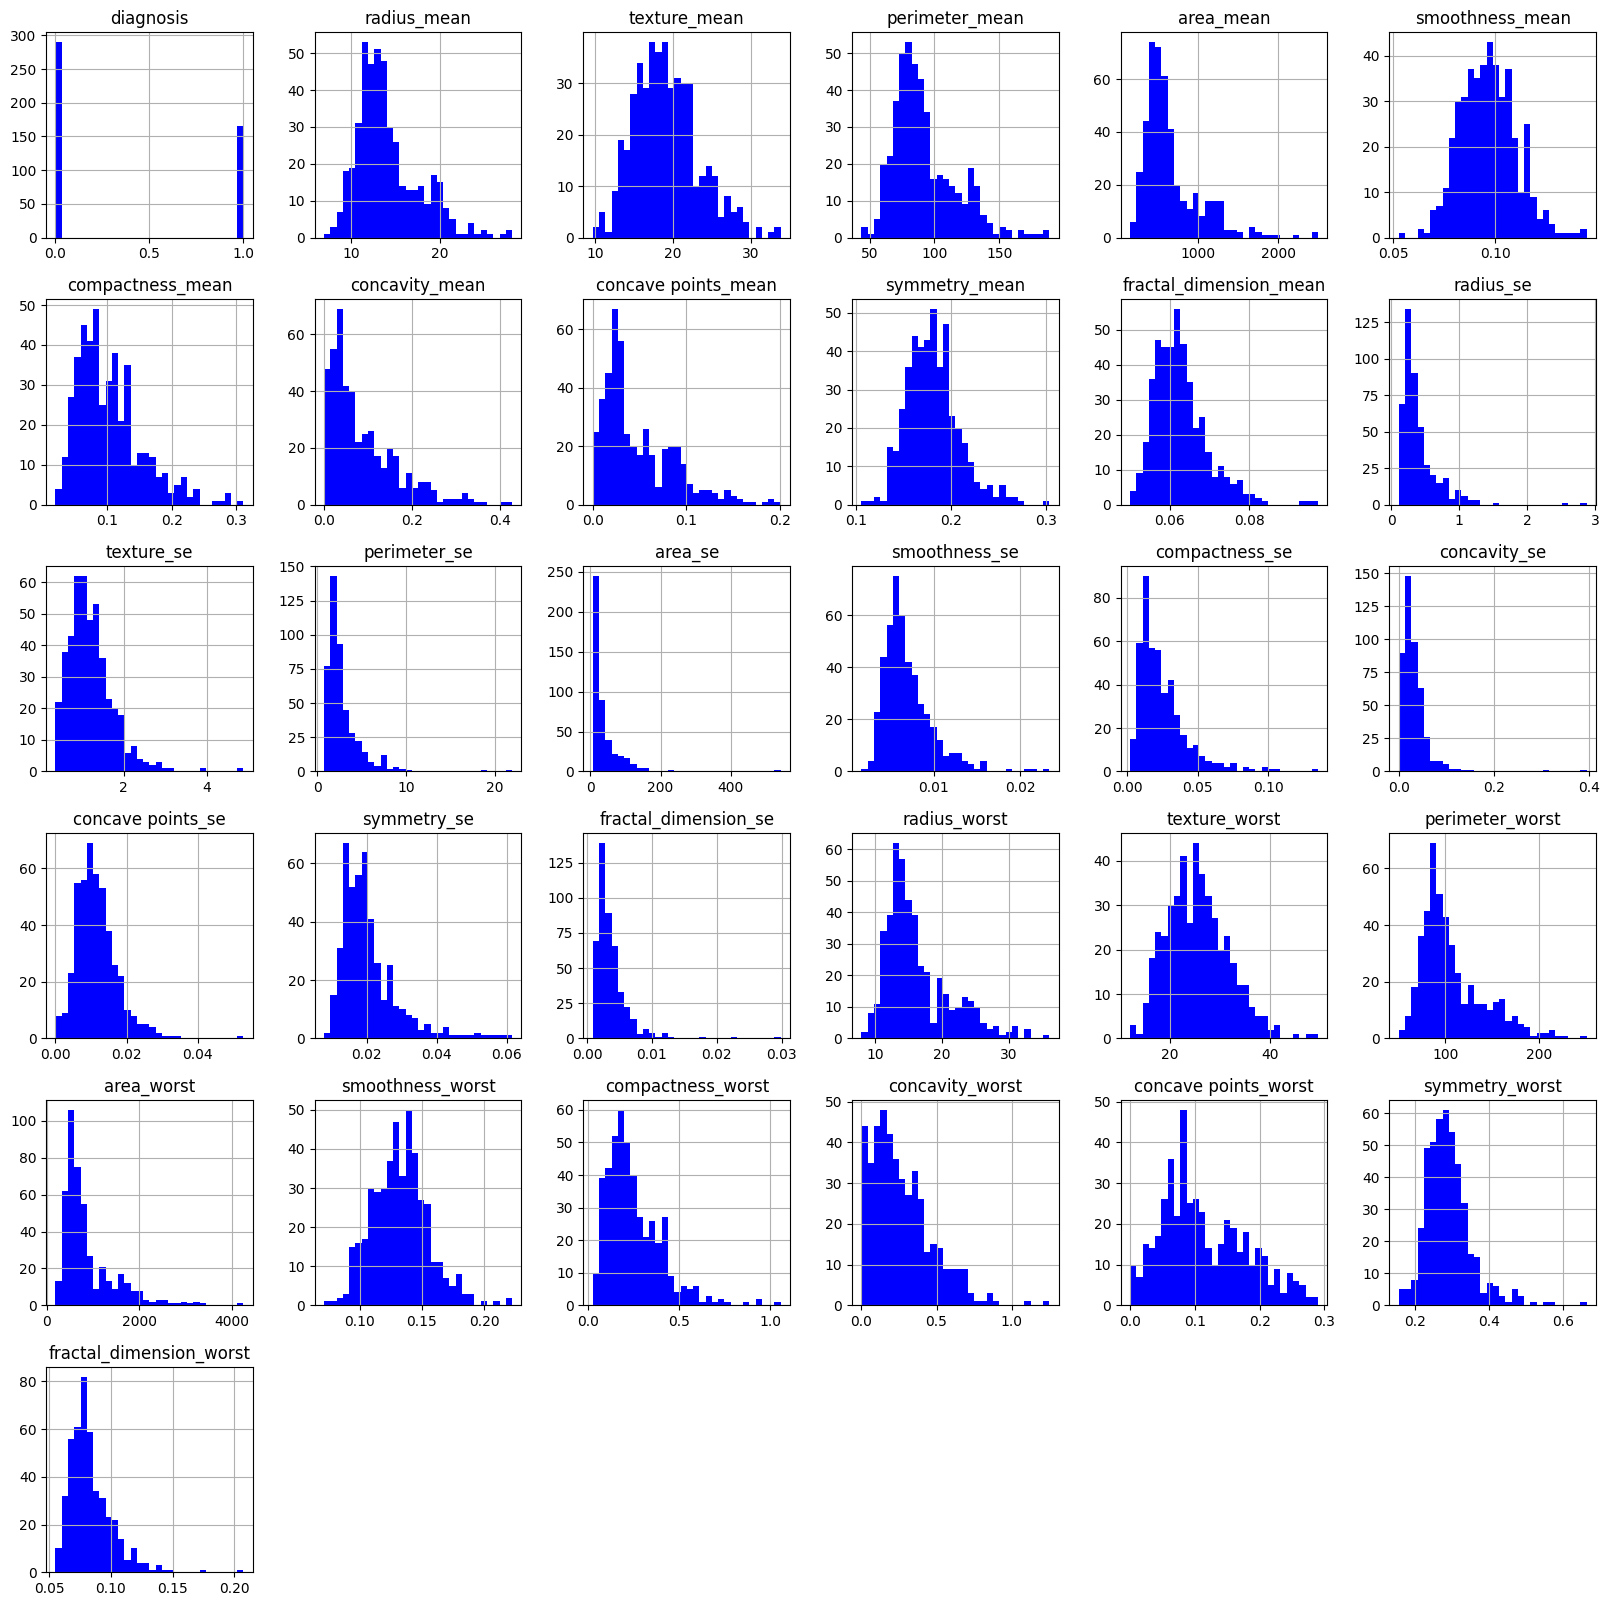

In [258]:
# Further explore data distribution visually
df.hist(bins=30, figsize=(20,20), color='b')
plt.show()

<p style="background-color:#FDEBD0;"><b>Comment: </b>The dataset largely deviates from a normal distribution, requiring data transformation techniques to improve model performance and accuracy. Several features are highly skewed.</p>

In [259]:
# Check for zero values before transformations
features_with_zero = [var for var in df.columns if (df[var] == 0.0).any() and var != 'diagnosis']
print(features_with_zero)


['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


In [260]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [261]:
# Transform data for normalization

# Right skewed data (square root transformation for moderately skewed, log transformation 
# for highly skewed data without zero)
to_log = ['area_se', 'perimeter_se', 'compactness_worst']
to_sqrt = [col for col in df.columns if col not in ('diagnosis', 'area_se', 'perimeter_se', 'texture_mean', 
                                                    'smoothness_mean', 'symmetry_mean', 'texture_worst', 
                                                    'concave points_worst', 'smoothness_worst')]
for var in to_log:
    df[f"{var}_trans"] = np.log1p(df[var])
for var in to_sqrt:
    df[f"{var}_trans"] = np.sqrt(df[var])


In [262]:
# Check data distributions and outliers
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se_trans,perimeter_se_trans,compactness_worst_trans,radius_mean_trans,perimeter_mean_trans,area_mean_trans,compactness_mean_trans,concavity_mean_trans,concave points_mean_trans,fractal_dimension_mean_trans,radius_se_trans,texture_se_trans,smoothness_se_trans,compactness_se_trans,concavity_se_trans,concave points_se_trans,symmetry_se_trans,fractal_dimension_se_trans,radius_worst_trans,perimeter_worst_trans,area_worst_trans,concavity_worst_trans,symmetry_worst_trans,fractal_dimension_worst_trans
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.362637,14.112499,19.152879,91.818286,653.819121,0.096413,0.103319,0.087485,0.048690,0.180939,0.062668,0.402524,1.209881,2.825247,40.285618,0.007003,0.025063,0.031473,0.011646,0.020525,0.003710,16.256097,25.538747,107.031407,881.189890,0.132459,0.251862,0.267491,0.114448,0.290416,0.083491,3.411454,1.251727,0.481024,3.729408,9.505029,24.786133,0.312550,0.266246,0.203118,0.249985,0.607438,1.075271,0.082212,0.150523,0.163252,0.104130,0.140926,0.058488,3.990954,10.229886,28.419851,0.476249,0.536010,0.287493
std,0.481291,3.535375,4.158963,24.313012,358.166179,0.013799,0.050490,0.077802,0.038597,0.027398,0.006819,0.284371,0.541961,2.037754,47.730421,0.002844,0.017510,0.031106,0.005897,0.008196,0.002610,4.890553,6.100631,33.869187,586.395654,0.022626,0.153109,0.199638,0.065321,0.062992,0.017814,0.706231,0.392614,0.143257,0.452176,1.214885,6.289171,0.075124,0.128973,0.086311,0.013255,0.183349,0.231931,0.015654,0.049107,0.069514,0.028375,0.025817,0.017032,0.573674,1.544696,8.582764,0.201911,0.055824,0.028998
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,2.107543,0.563608,0.165197,2.642158,6.617401,11.979149,0.139212,0.000000,0.000000,0.223517,0.333916,0.600167,0.041388,0.047455,0.000000,0.000000,0.088781,0.029913,2.816026,7.100000,13.608821,0.000000,0.395601,0.234606
25%,0.000000,11.685000,16.070000,75.100000,418.500000,0.086650,0.066160,0.029950,0.020720,0.161850,0.057885,0.232050,0.832400,1.594000,17.740000,0.005163,0.013050,0.015215,0.007691,0.015015,0.002208,13.020000,21.005000,84.135000,514.650000,0.116400,0.147750,0.116550,0.064955,0.249400,0.071365,2.930660,0.953201,0.384383,3.418333,8.666025,20.457248,0.257216,0.173061,0.143944,0.240593,0.481716,0.912359,0.071857,0.114236,0.123349,0.087698,0.122536,0.046995,3.608323,9.172513,22.685894,0.341394,0.499399,0.267142
50%,0.000000,13.280000,18.750000,85.980000,541.800000,0.095940,0.092280,0.060150,0.033410,0.179200,0.061540,0.314700,1.127000,2.222000,23.560000,0.006369,0.020250,0.025440,0.010780,0.018720,0.003071,14.850000,25.210000,97.110000,675.200000,0.131600,0.211800,0.228200,0.098610,0.281500,0.079610,3.201119,1.170002,0.460217,3.644173,9.272540,23.276598,0.303776,0.245255,0.182784,0.

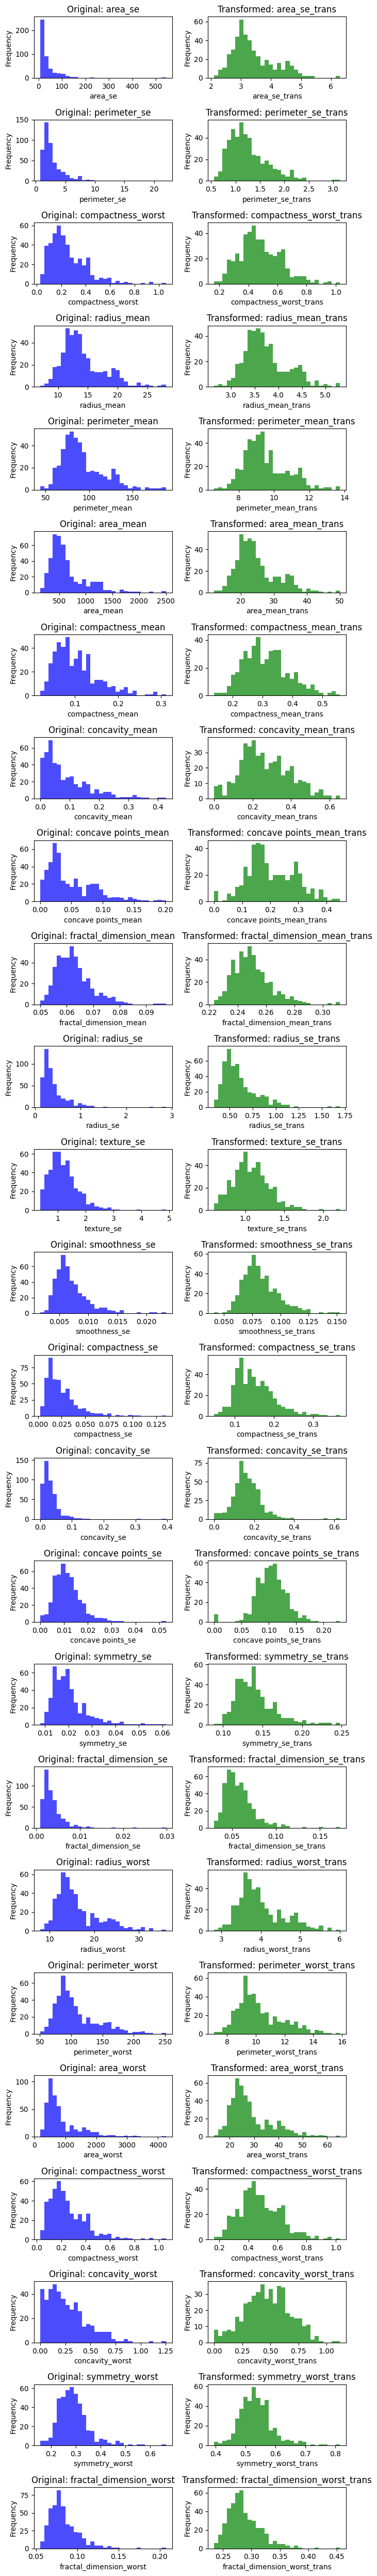

In [263]:
# Plot histograms for original and transformed data side by side

# Create subplots
variables = to_log + to_sqrt
num_vars = len(variables)
fig, axes = plt.subplots(num_vars, 2, figsize=(7, num_vars * 2))
fig.tight_layout(pad=5.0)

for i, var in enumerate(variables):
    # Original data histogram
    axes[i, 0].hist(df[var], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f"Original: {var}")
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel("Frequency")
    
    # Transformed data histogram
    transformed_var = f"{var}_trans"
    axes[i, 1].hist(df[transformed_var], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f"Transformed: {transformed_var}")
    axes[i, 1].set_xlabel(transformed_var)
    axes[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [264]:
# Drop original (before normalizing) features 
df.drop(variables, axis=1, inplace=True)

In [265]:
df.sample(5)

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,concave points_worst,area_se_trans,perimeter_se_trans,compactness_worst_trans,radius_mean_trans,perimeter_mean_trans,area_mean_trans,compactness_mean_trans,concavity_mean_trans,concave points_mean_trans,fractal_dimension_mean_trans,radius_se_trans,texture_se_trans,smoothness_se_trans,compactness_se_trans,concavity_se_trans,concave points_se_trans,symmetry_se_trans,fractal_dimension_se_trans,radius_worst_trans,perimeter_worst_trans,area_worst_trans,concavity_worst_trans,symmetry_worst_trans,fractal_dimension_worst_trans
421,1,22.55,0.10380,0.1926,34.27,0.1380,0.13620,2.972464,1.062985,0.522781,3.777565,9.683491,25.095816,0.339706,0.382492,0.247770,0.244581,0.450222,1.360515,0.078186,0.160717,0.215523,0.112960,0.120457,0.061286,3.910243,10.212737,26.987034,0.650692,0.519423,0.288981
115,1,22.15,0.09831,0.1582,30.88,0.1512,0.23880,4.730921,1.926436,0.561249,4.450843,11.401754,35.496479,0.320468,0.384578,0.308188,0.232271,0.870747,1.008464,0.080585,0.137586,0.184147,0.123329,0.116447,0.044688,5.226854,13.667480,48.969378,0.732939,0.526118,0.275953
225,0,13.27,0.09198,0.1592,16.93,0.1170,0.05802,2.930660,0.907855,0.327414,3.710795,9.384029,24.139180,0.249419,0.103102,0.138456,0.243146,0.468081,0.833427,0.065939,0.090294,0.065361,0.082638,0.146765,0.042450,3.830144,9.704123,25.711865,0.193184,0.531319,0.260653
129,1,26.57,0.11410,0.2395,33.48,0.1491,0.29030,4.412313,1.688988,0.870862,4.592385,11.945711,36.207734,0.532165,0.498698,0.386782,0.271993,0.793599,0.873441,0.065215,0.218151,0.196774,0.125180,0.134090,0.072767,5.165269,13.285330,45.705580,0.823408,0.640156,0.358329
248,0,18.17,0.10760,0.1641,22.15,0.1533,0.14070,2.965273,0.991769,0.619839,3.556684,9.093404,22.036334,0.365240,0.283143,0.225255,0.261801,0.482079,0.795739,0.075525,0.158177,0.162358,0.101587,0.132627,0.059691,3.792097,9.761660,25.173399,0.598498,0.568331,0.321403


<h1 style="background-color:#EBF5FB; color:#2471A3;">Correlation between features</h1>

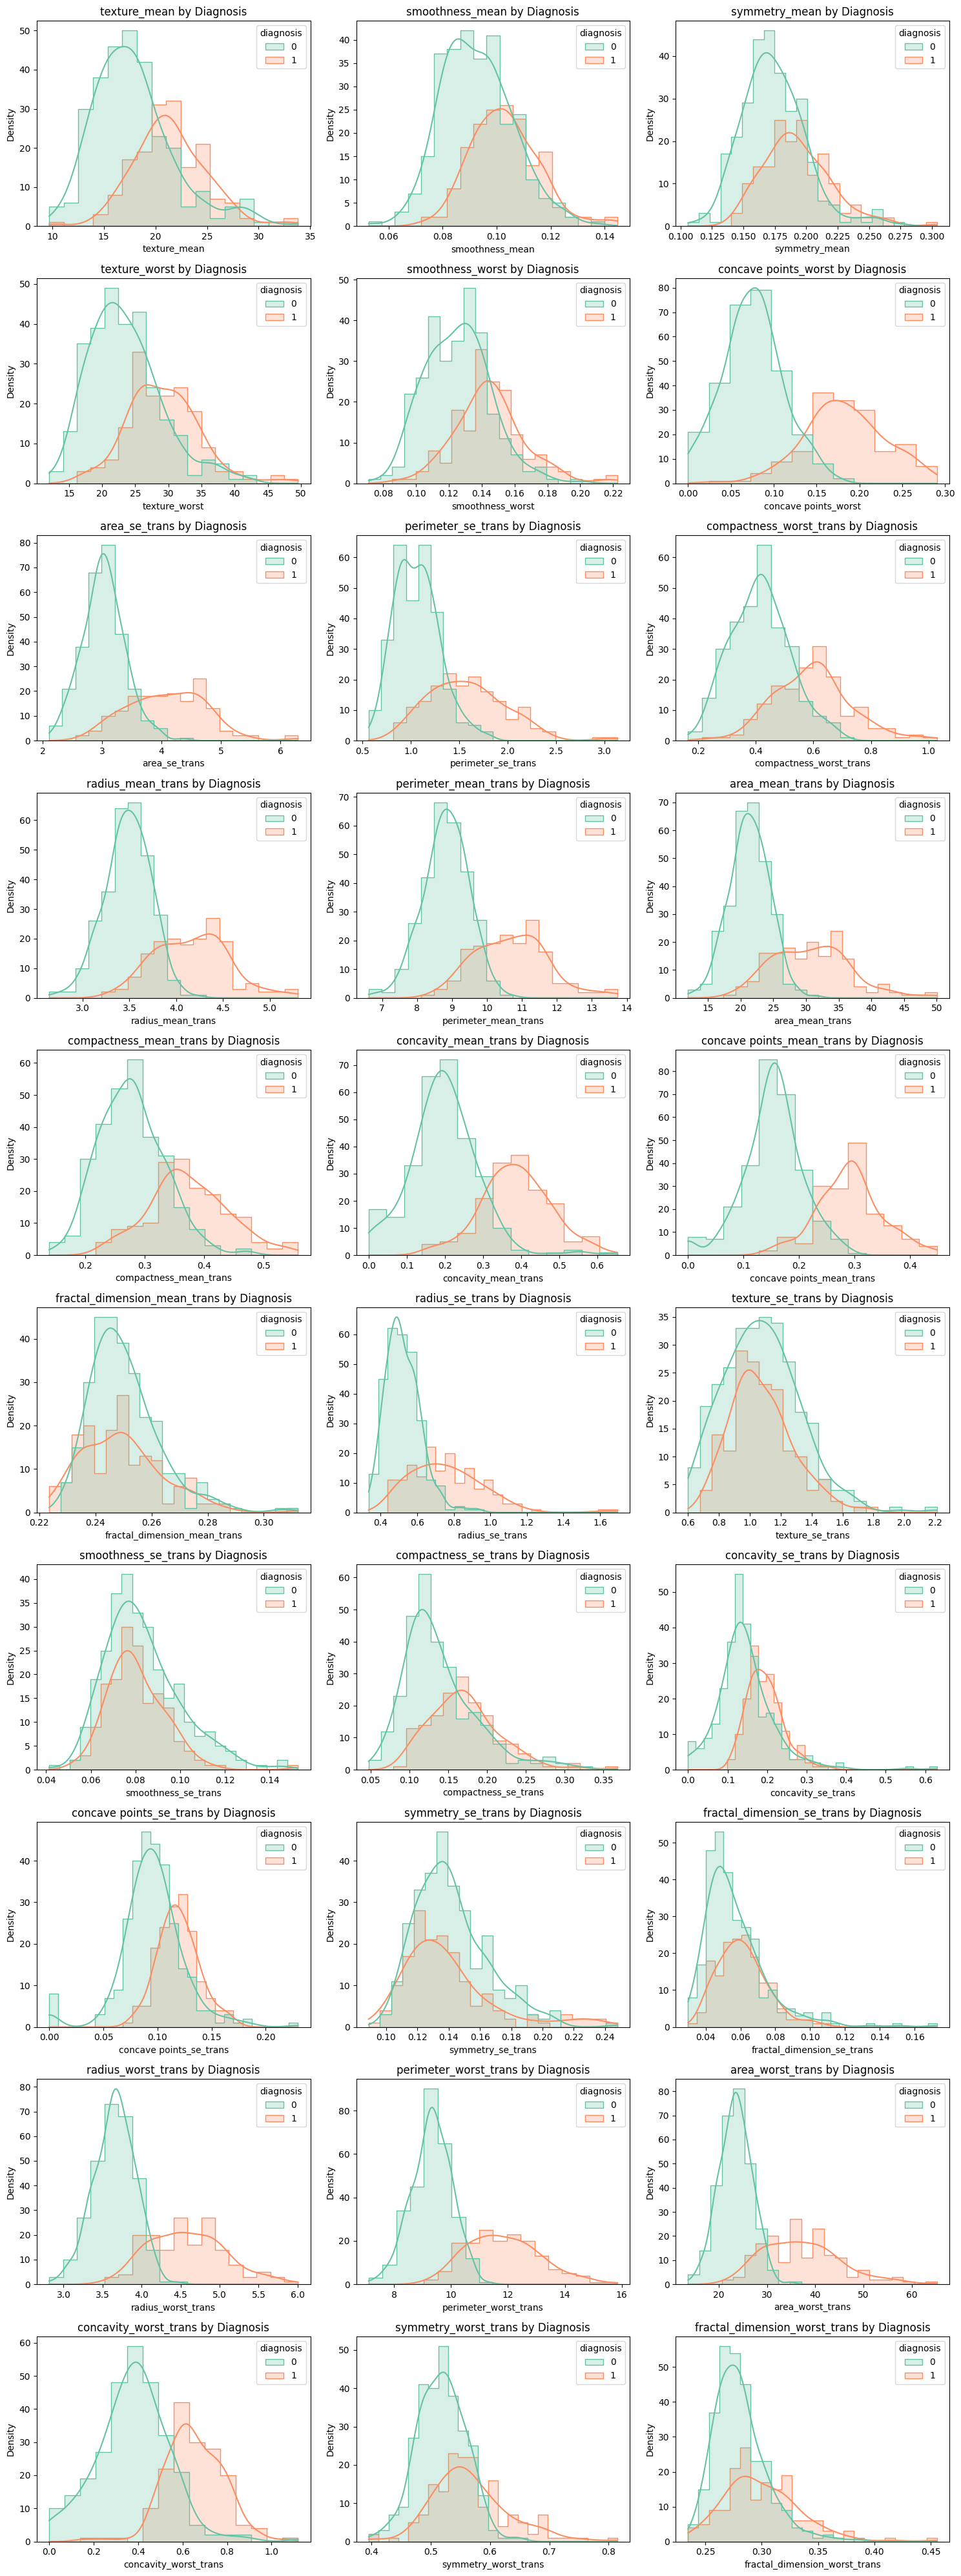

In [266]:
# Plot features by target feature levels


df['diagnosis'] = df['diagnosis'].astype(str)  # Convert to string for grouping
features = df.columns.drop('diagnosis')  # All columns except the target

# Create subplots
num_features = len(features)
cols = 3 
rows = (num_features // cols) + int(num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(
        data=df,
        x=feature,
        hue='diagnosis',
        kde=True,  # Add density curves
        ax=ax,
        palette='Set2',
        element='step',
        common_norm=False  # Separate normalization for each level
    )
    ax.set_title(f"{feature} by Diagnosis")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

<p style="background-color:#FDEBD0;"><b>Comment: </b>The distribution of several features by diagnosis, shows the two distribution overlapping, thus, these features most likely do not contribute to target feature differentiation.</p>

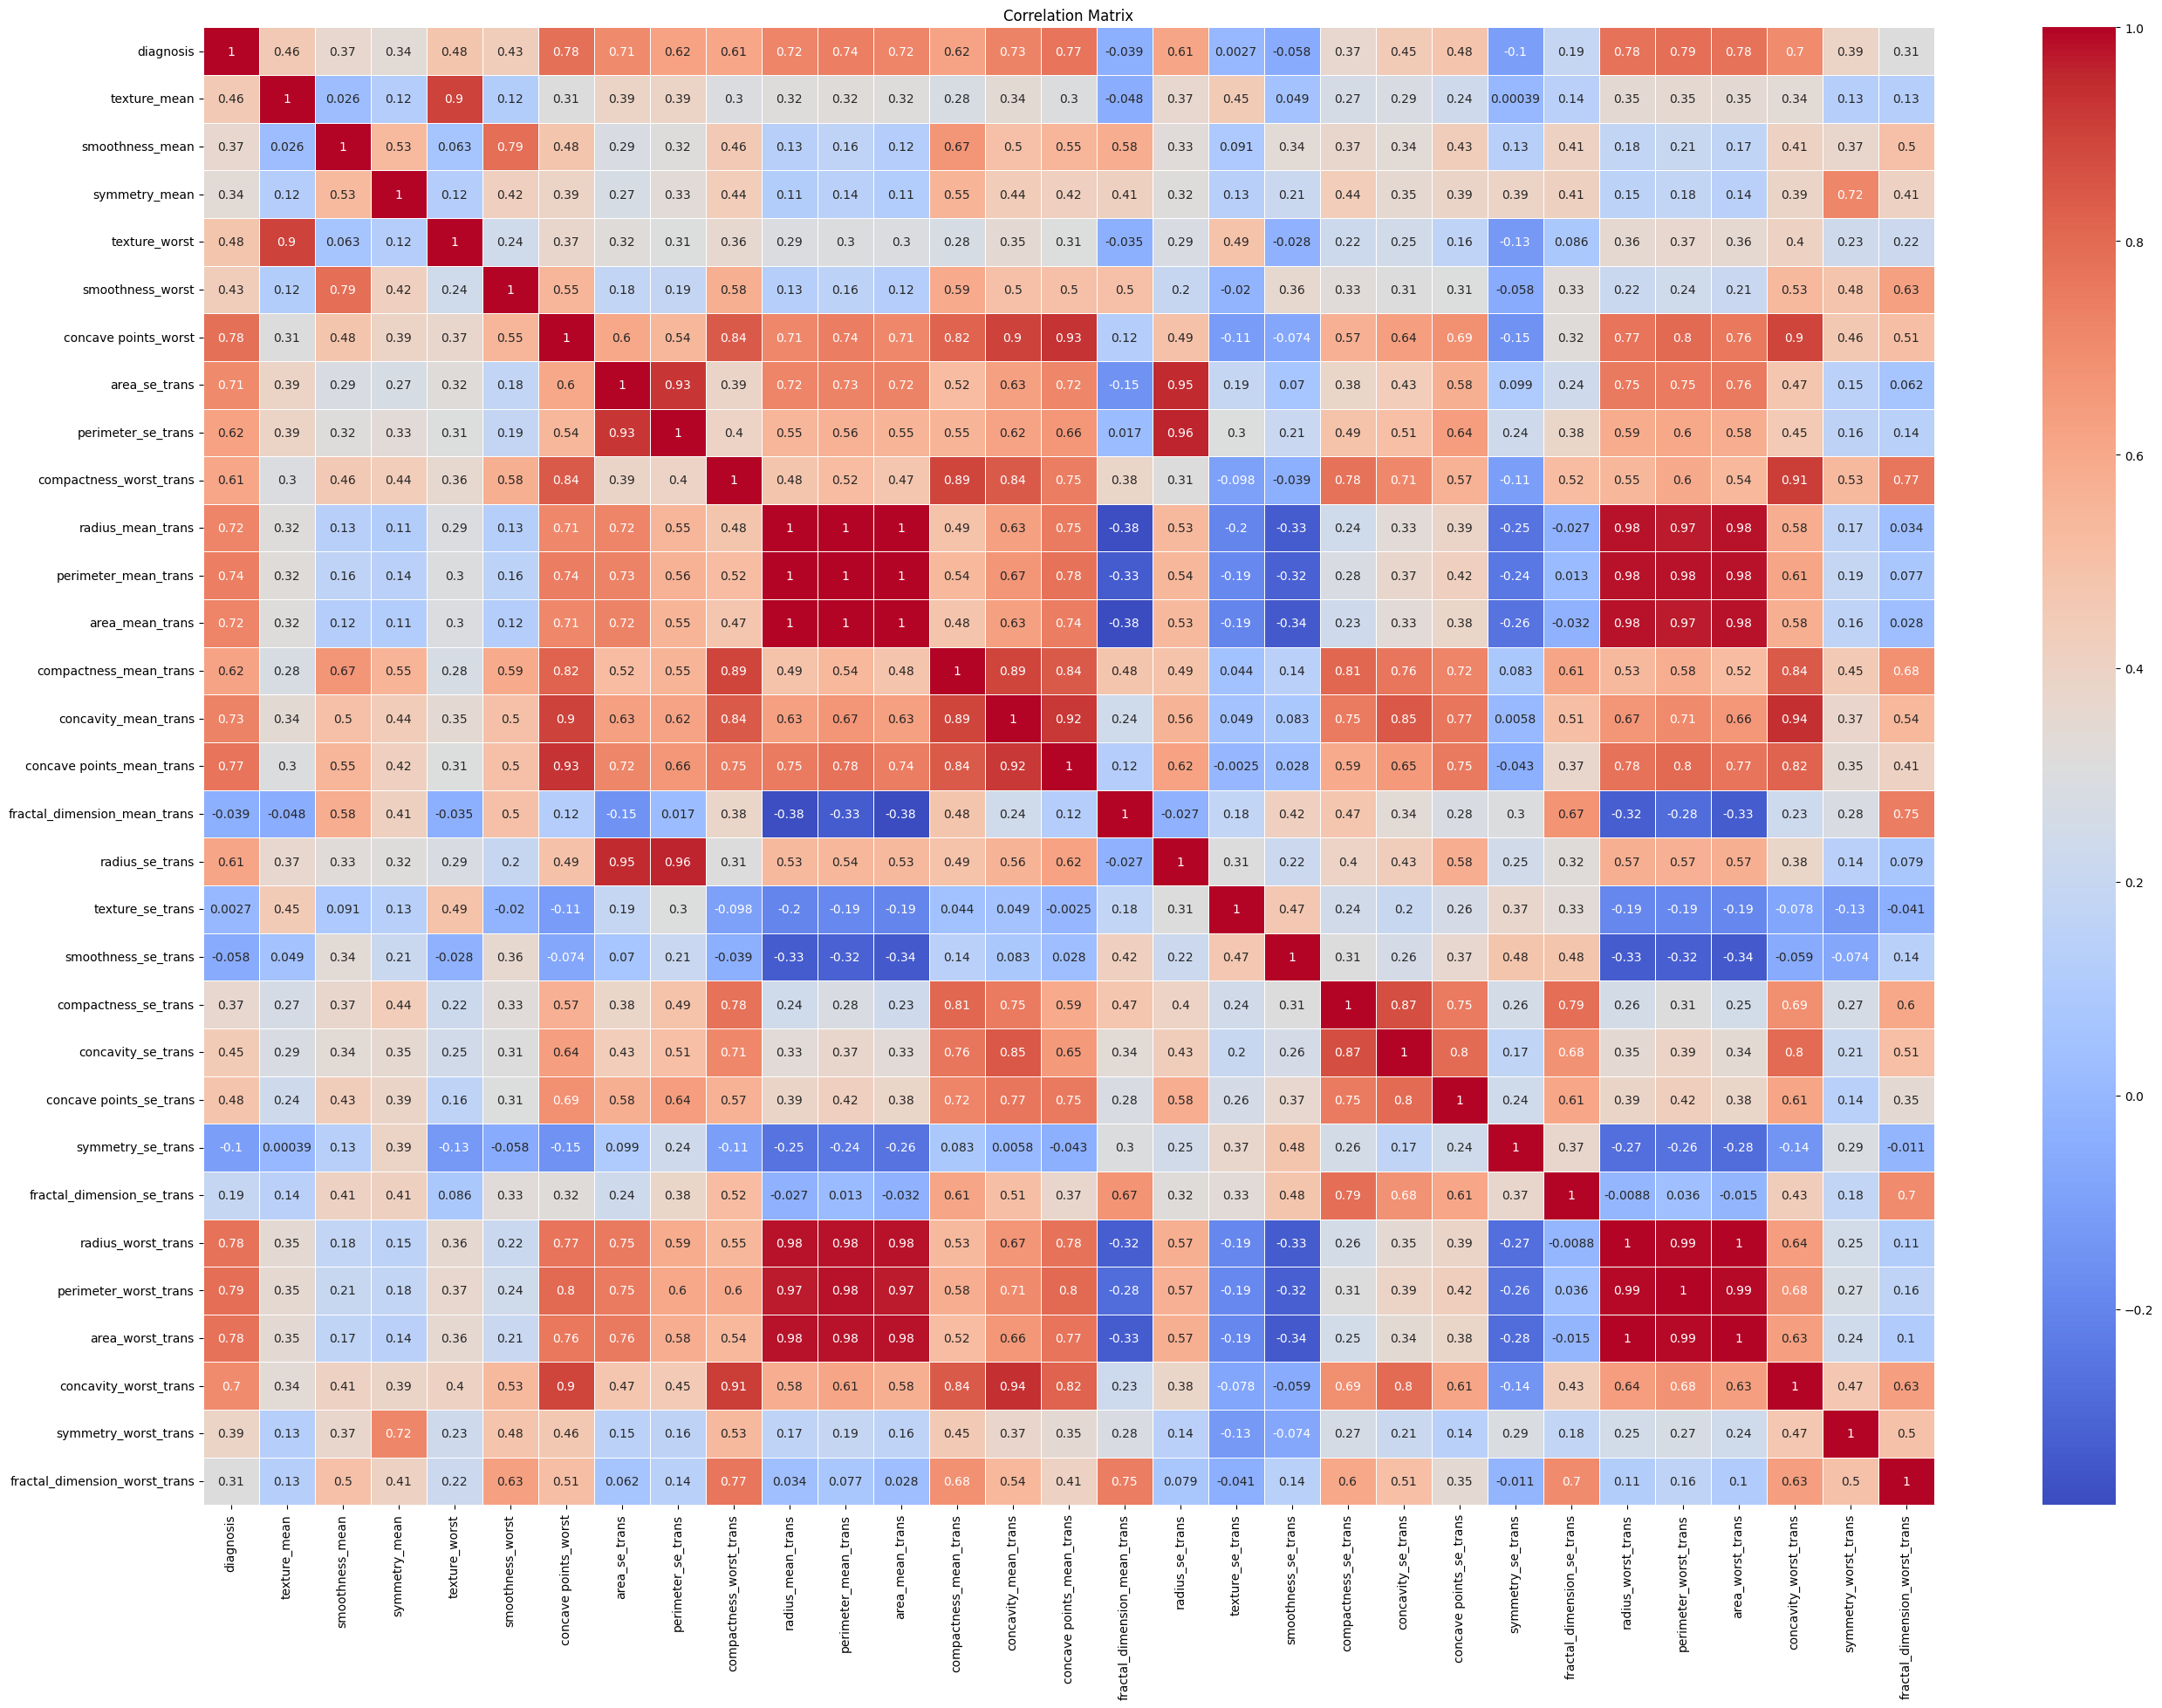

In [267]:
# Plot the correlation coefficients
plt.figure(figsize=(32, 22))
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<p style="background-color:#FDEBD0;"><b>CHECK POINT: </b>There is high collinearity between features. This was expected given the fact that the features correspond to 10 distinct tumor measurement categories, each with 3 potentially related  measurement descriptives: mean, standard error (se), and worst. 
Highly correleted features (r >= 0.9) will be reduced to one only that has highest correlation to the target feature.</p>

In [268]:
df.drop(['texture_mean', 'perimeter_se_trans', 'radius_mean_trans', 'area_mean_trans', 
         'concavity_mean_trans', 'radius_worst_trans', 'area_worst_trans'], axis=1, inplace=True)

<h1 style="background-color:#EBF5FB; color:#2471A3;">Automatic feature selection</h1>

In [269]:
# Split X_train and y_train and Scale

X_train = df.drop(['diagnosis'], axis=1)
feature_names = X_train.columns
scaler = StandardScaler() # scale
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train = X_train.values

y_train = df['diagnosis'].values

print(X_train.shape, y_train.shape)

(455, 23) (455,)


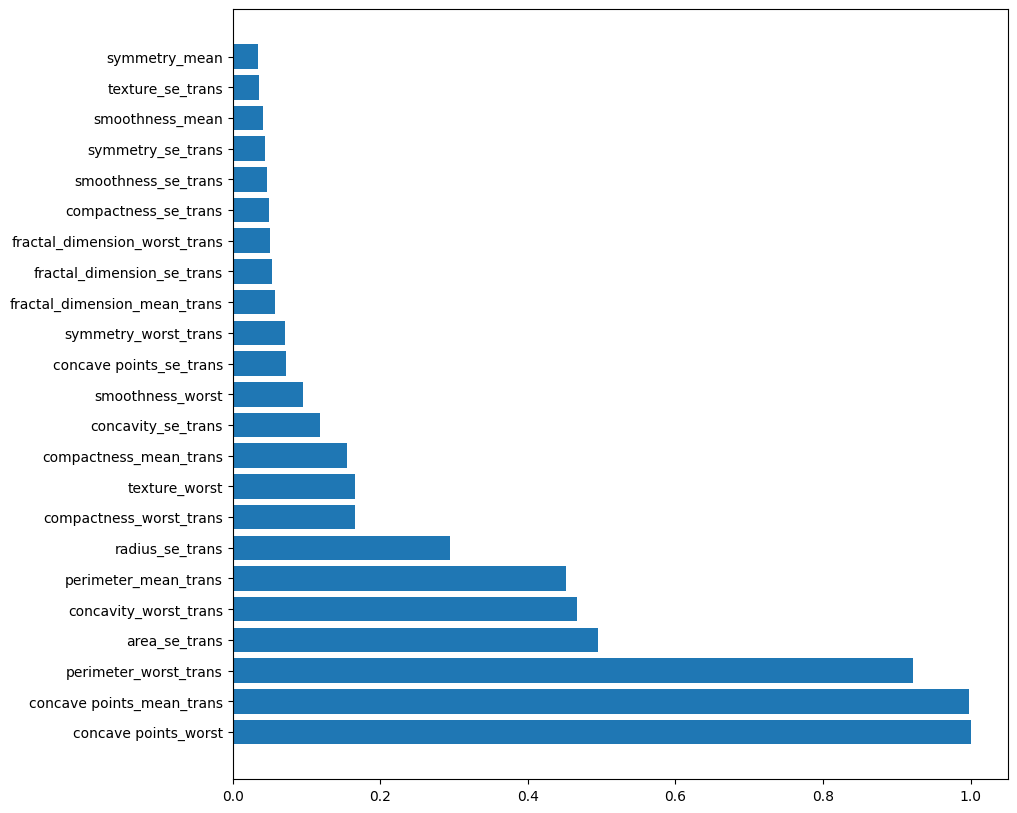

In [270]:
# Run a Random Forest regressor to get feature importances
rf = RandomForestClassifier(random_state=0, n_estimators=300, max_depth=8).fit(X_train, y_train)

importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [271]:
from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

rf = RandomForestClassifier(random_state=0, n_estimators=300, max_depth=8)
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.1318840579710145 +/- 0.039078512698532915
# features 2 error 0.08797101449275366 +/- 0.0243187177431886
# features 3 error 0.07048309178743961 +/- 0.02972757824802779
# features 4 error 0.06816425120772947 +/- 0.03493755744546047
# features 5 error 0.06376811594202898 +/- 0.025190353284026475
# features 6 error 0.052705314009661816 +/- 0.026521211156012928
# features 7 error 0.05705314009661835 +/- 0.02816507982639335
# features 8 error 0.05932367149758454 +/- 0.03572319229616649
# features 9 error 0.054927536231884046 +/- 0.024659505347744214
# features 10 error 0.05053140096618357 +/- 0.02417120201668335
# features 11 error 0.05053140096618356 +/- 0.02212982260478421
# features 12 error 0.04830917874396133 +/- 0.019181846692886934
# features 13 error 0.052608695652173895 +/- 0.019793149557347338
# features 14 error 0.05048309178743959 +/- 0.019735053409520267
# features 15 error 0.05048309178743959 +/- 0.019735053409520267
# features 16 error 0.050434782608695626

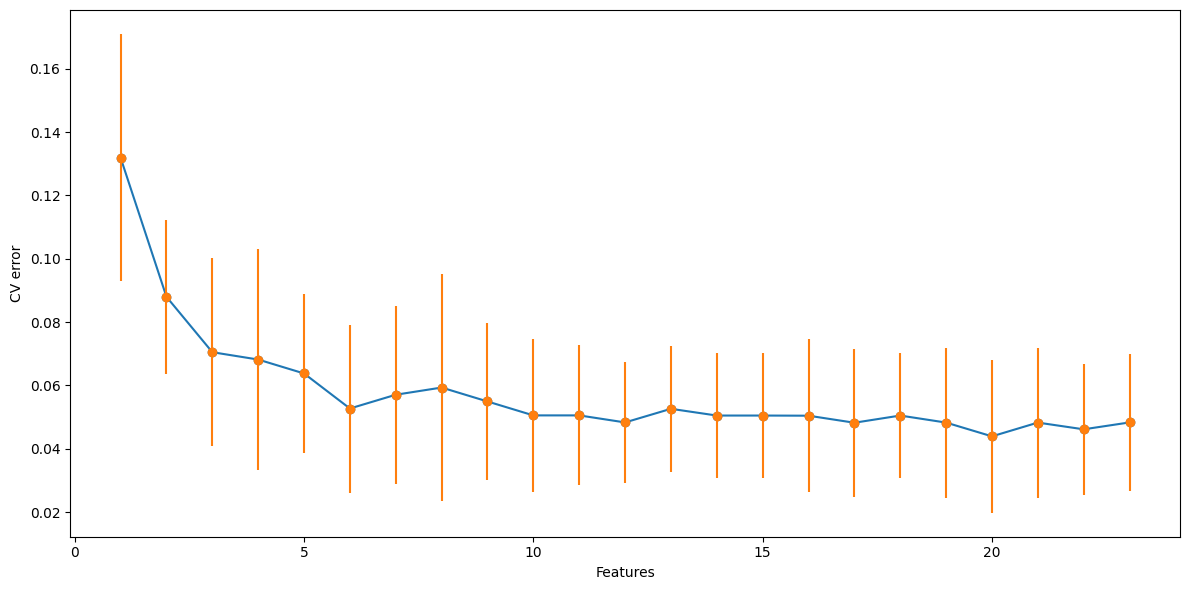

In [272]:
# Plor CV error per number of features in the model
plt.figure(figsize=(12,6))
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('Features')
plt.ylabel('CV error')
plt.tight_layout()
plt.show()

In [273]:
selected_features = indices[0:6]

rf_features_names = [feature_names[sf] for sf in selected_features]
print(rf_features_names)

['concave points_mean_trans', 'concave points_worst', 'perimeter_worst_trans', 'perimeter_mean_trans', 'concavity_worst_trans', 'area_se_trans']


<h1 style="background-color:#EBF5FB; color:#2471A3;">Model building</h1>

In [274]:
# Train preprocessing overview

# Load data
df = pd.read_csv('./train.csv', sep=';', decimal='.')

# Drop uninformative features
df.drop(['id'], axis=1, inplace=True)

# Recode target variable to numerical
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

# Transform data for normalization
for var in to_log:
    df[f"{var}_trans"] = np.log1p(df[var])
for var in to_sqrt:
    df[f"{var}_trans"] = np.sqrt(df[var])

# Drop original (before normalizing) features 
df.drop(variables, axis=1, inplace=True)

df.drop(['texture_mean', 'perimeter_se_trans', 'radius_mean_trans', 'area_mean_trans', 
         'concavity_mean_trans', 'radius_worst_trans', 'area_worst_trans'], axis=1, inplace=True)

# Split into X (keep only features from RF selection) and y
y = df['diagnosis']
X = df[rf_features_names]

# Scale
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Prep data for modeling
X_train = X.values
y_train = y.values


In [275]:
# Test preprocessing overview

# Load data
df = pd.read_csv('./test.csv', sep=';', decimal='.')

# Drop uninformative features
df.drop(['id'], axis=1, inplace=True)

# Recode target variable to numerical
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

# Transform data for normalization
for var in to_log:
    df[f"{var}_trans"] = np.log1p(df[var])
for var in to_sqrt:
    df[f"{var}_trans"] = np.sqrt(df[var])

# Drop original (before normalizing) features 
df.drop(variables, axis=1, inplace=True)

df.drop(['texture_mean', 'perimeter_se_trans', 'radius_mean_trans', 'area_mean_trans', 
         'concavity_mean_trans', 'radius_worst_trans', 'area_worst_trans'], axis=1, inplace=True)

# Remove null values in target
df = df[~df['diagnosis'].isnull()]

# Split into X (keep only features from RF selection) and y
y = df['diagnosis']
X = df[rf_features_names]

# Scale
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

# Prep data for modeling
X_test = X.values
y_test = y.values

<h3 style="background-color:#EBF5FB; color:#2471A3;">Logistic regression model</h3>

In [276]:
# Set params for Grid Search
C_vector = np.logspace(-4, -1, 15)
penalty_list = ['l1', 'l2']
param_grid = {'C': C_vector, 'penalty': penalty_list}

# Train Logistic Regression with GridSearchCV
grid = GridSearchCV(
    LogisticRegression(solver='saga', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............C=0.00016378937069540646, penalty=l1; total time=   0.0s
[CV] END ...............C=0.0001637893706954064

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': array([0.0001    , 0.00016379, 0.00026827, 0.0004394 , 0.00071969,
       0.00117877, 0.0019307 , 0.00316228, 0.00517947, 0.00848343,
       0.01389495, 0.02275846, 0.03727594, 0.06105402, 0.1       ]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [277]:
# Print the most optimal hyperparameters the score
best_C = grid.best_params_['C']
best_penalty = grid.best_params_['penalty']
best_F1_score = grid.best_score_

print(f"Best mean cross-validation F1 score: {best_F1_score:.3f}")
print(f"Best hyperparameters: C = {best_C:.3f}, penalty = {best_penalty}")

Best mean cross-validation F1 score: 0.933
Best hyperparameters: C = 0.100, penalty = l1


/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_1326/812016058.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


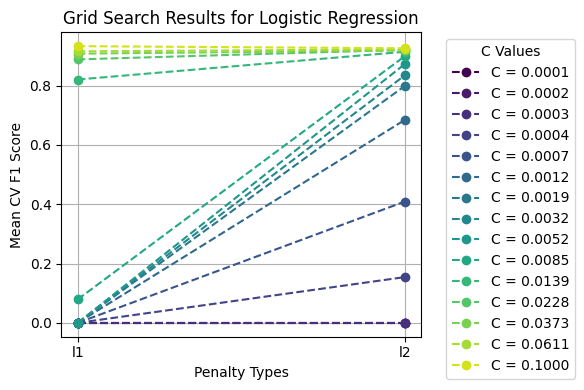

In [278]:
# Plot GridSearch results

# Retrieve the mean test scores
scores = grid.cv_results_['mean_test_score'].reshape(len(C_vector), len(penalty_list))

# Dynamically generate colors using a colormap
cmap = get_cmap('viridis')  
colors = [cmap(i / len(C_vector)) for i in range(len(C_vector))]

# Set up the plot
plt.figure(figsize=(6, 4))

# Loop through C_vector to plot scores for each penalty
for i, C in enumerate(C_vector):
    plt.plot(
        penalty_list, scores[i, :],
        linestyle='--', marker='o',
        color=colors[i],
        label=f'C = {C:.4f}'
    )

# Add legend, labels, and grid
plt.legend(title='C Values', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Penalty Types')
plt.ylabel('Mean CV F1 Score')
plt.title('Grid Search Results for Logistic Regression')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [279]:
# Train the best model
lr_best = LogisticRegression(solver='saga', max_iter=1000, C=best_C, penalty=best_penalty, random_state=42)
lr_best.fit(X_train, y_train)

train_score = lr_best.score(X_train, y_train)
test_score = lr_best.score(X_test, y_test)

print(f"\nTrain accuracy: {train_score}")
print(f"Test accuracy: {test_score}")


Train accuracy: 0.9516483516483516
Test accuracy: 0.9298245614035088


In [280]:
# Print classification report
y_pred = lr_best.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the report in a dict format
report_dict = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 600x600 with 0 Axes>

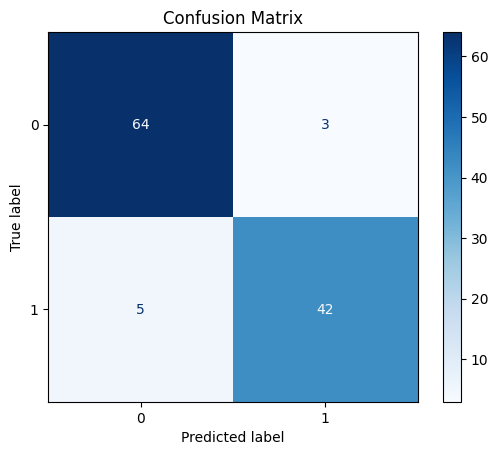

In [281]:
# Print the confusion matrix 
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

In [282]:
# Log the model and its parameters and scores

mlflow.set_experiment('Breast cancer prediction')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

with mlflow.start_run(run_name=f'logistic_regression_run') as run:

    mlflow.set_tag('model', 'Logistic Regression')
    mlflow.set_tag('dataset', 'breast_cancer')

    # Log model params
    mlflow.log_params({
        'model_name': 'logistic_regression',
        'C': best_C,
        'penalty': best_penalty,
        'solver': 'saga',
        'max_iter': 1000
    })

    # Log metrics
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.log_metric('roc_auc', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:, 1]))

    mlflow.log_metric('train_acc', train_score)
    mlflow.log_metric('test_acc', test_score)

    # Log model
    mlflow.sklearn.log_model(lr_best, "logistic_regression_model", input_example=X_test[:1])

    # Log confusion matrix
    confusion_path = 'confusion_matrix.txt'
    np.savetxt(confusion_path, confusion)
    mlflow.log_artifact(confusion_path)


🏃 View run logistic_regression_run at: http://127.0.0.1:5000/#/experiments/835005727565071984/runs/6d482b3e1abb4e60b100906fecac1062
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/835005727565071984


<h3 style="background-color:#EBF5FB; color:#2471A3;">Gradient boosting model</h3>

In [283]:
# Parameter grid for Gradient Boosting Classifier
max_depth = range(1, 15)  
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
param_grid = {'max_depth': max_depth, 'learning_rate': learning_rate}

# Use the custom classifier in GridSearchCV
grid = GridSearchCV(
    GradientBoostingClassifier(n_estimators=300, random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    verbose=2
)

# Fit the model
grid.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] END ..................learning_rate=0.0001, max_depth=1; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=1; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=1; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=1; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=1; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=2; total time=   0.2s
[CV] END ..................learning_rate=0.0001, max_depth=2; total time=   0.4s
[CV] END ..................learning_rate=0.0001, max_depth=2; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=2; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=2; total time=   0.1s
[CV] END ..................learning_rate=0.0001, max_depth=3; total time=   0.2s
[CV] END ..................learning_rate=0.00

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=300,
                                                  random_state=42),
             param_grid={'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01,
                                           0.02, 0.03, 0.05, 0.1, 0.15, 0.2,
                                           0.25, 0.3, 0.4, 0.5],
                         'max_depth': range(1, 15)},
             scoring='f1', verbose=2)

In [284]:
# Print the most optimal hyperparameters the score
best_max_depth = grid.best_params_['max_depth']
best_learning_rate = grid.best_params_['learning_rate']
best_F1_score = grid.best_score_

print(f"Best mean cross-validation F1 score: {best_F1_score:.3f}")
print(f"Best hyperparameters: max_depth = {best_max_depth}, learning_rate = {best_learning_rate}")


Best mean cross-validation F1 score: 0.923
Best hyperparameters: max_depth = 2, learning_rate = 0.02


/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_1326/1874859499.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


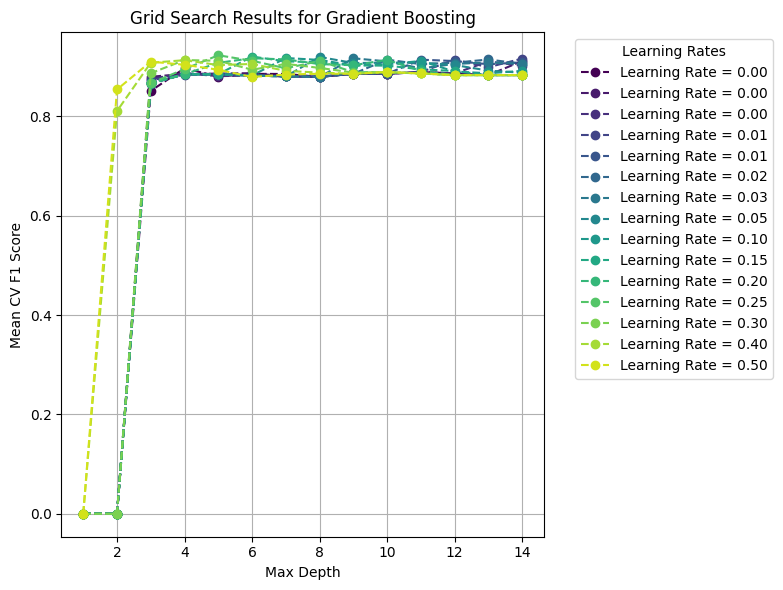

In [285]:
# Retrieve the mean test scores
scores = grid.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['learning_rate']))

# Dynamically generate colors using a colormap
cmap = get_cmap('viridis')
colors = [cmap(i / len(param_grid['learning_rate'])) for i in range(len(param_grid['learning_rate']))]

# Set up the plot
plt.figure(figsize=(8, 6))

# Loop through max_depth to plot scores for each learning rate
for i, learning_rate in enumerate(param_grid['learning_rate']):
    plt.plot(
        param_grid['max_depth'], scores[:, i],
        linestyle='--', marker='o',
        color=colors[i],
        label=f'Learning Rate = {learning_rate:.2f}'
    )

# Add legend, labels, and grid
plt.legend(title='Learning Rates', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV F1 Score')
plt.title('Grid Search Results for Gradient Boosting')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [286]:
# Train the best model
gb_best = GradientBoostingClassifier(n_estimators=300, max_depth=best_max_depth, learning_rate=best_learning_rate, random_state=42)
gb_best.fit(X_train, y_train)

train_score = gb_best.score(X_train, y_train)
test_score = gb_best.score(X_test, y_test)

print(f"\nTrain accuracy: {train_score}")
print(f"Test accuray: {test_score}")


Train accuracy: 0.989010989010989
Test accuray: 0.9298245614035088


In [287]:
# Print classification report
y_pred = lr_best.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the report in a dict format
report_dict = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 600x600 with 0 Axes>

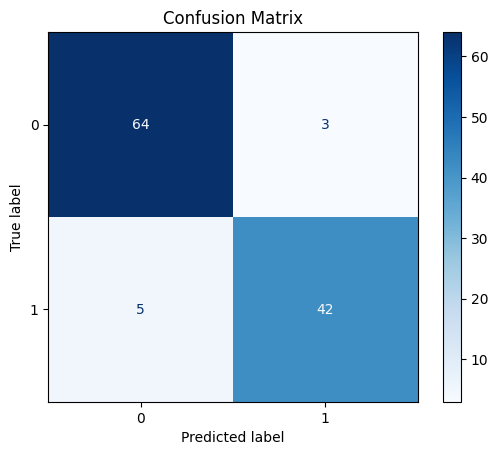

In [288]:
# Print the confusion matrix 
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

In [289]:
# Log the model with its parameters ans scores

mlflow.set_experiment('Breast cancer prediction')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

with mlflow.start_run(run_name=f'gradient_boosting_run') as run:

    mlflow.set_tag('model', 'Gradient Boosting')
    mlflow.set_tag('dataset', 'breast_cancer')

    # Log model params
    mlflow.log_params({
        'model_name': 'gradient_boosting',
        'max_depth': best_C,
        'learning_rate': best_penalty,
        'n_estimators': 300
    })

    # Log metrics
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.log_metric('roc_auc', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:, 1]))

    mlflow.log_metric('train_acc', train_score)
    mlflow.log_metric('test_acc', test_score)

    # Log model
    mlflow.sklearn.log_model(gb_best, "gradient_boosting_model", input_example=X_test[:1])

    # Log confusion matrix
    confusion_path = 'confusion_matrix.txt'
    np.savetxt(confusion_path, confusion)
    mlflow.log_artifact(confusion_path)

🏃 View run gradient_boosting_run at: http://127.0.0.1:5000/#/experiments/835005727565071984/runs/2a983633d539404eab09625ec12a36e7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/835005727565071984


<h3 style="background-color:#EBF5FB; color:#2471A3;">Logistic Regression model handling class imbalance with SMOTE</h3>

In [290]:
# Train preprocessing overview

# Load data
df = pd.read_csv('./train.csv', sep=';', decimal='.')

# Drop uninformative features
df.drop(['id'], axis=1, inplace=True)

# Recode target variable to numerical
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

# Transform data for normalization
for var in to_log:
    df[f"{var}_trans"] = np.log1p(df[var])
for var in to_sqrt:
    df[f"{var}_trans"] = np.sqrt(df[var])

# Drop original (before normalizing) features 
df.drop(variables, axis=1, inplace=True)

# Drop highly correlated features
df.drop(['texture_mean', 'perimeter_se_trans', 'radius_mean_trans', 'area_mean_trans', 
         'concavity_mean_trans', 'radius_worst_trans', 'area_worst_trans'], axis=1, inplace=True)

# Split into X (keep only features from RF selection) and y
y = df['diagnosis']
X = df[rf_features_names]

# --------------------------- Handle class imbalance ------------------------------------ #
smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

# Scale
X_res = pd.DataFrame(scaler.fit_transform(X_res), columns=X_res.columns)

# Prep data for modeling
X_train = X_res.values
y_train = y_res.values

/opt/anaconda3/envs/ai_deployment/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/envs/ai_deployment/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [291]:
# Set params for Grid Search
C_vector = np.logspace(-4, -1, 15)
penalty_list = ['l1', 'l2']
param_grid = {'C': C_vector, 'penalty': penalty_list}

# Train Logistic Regression with GridSearchCV
grid = GridSearchCV(
    LogisticRegression(solver='saga', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............C=0.00016378937069540646, penalty=l1; total time=   0.0s
[CV] END ...............C=0.0001637893706954064

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': array([0.0001    , 0.00016379, 0.00026827, 0.0004394 , 0.00071969,
       0.00117877, 0.0019307 , 0.00316228, 0.00517947, 0.00848343,
       0.01389495, 0.02275846, 0.03727594, 0.06105402, 0.1       ]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [292]:
# Print the most optimal hyperparameters the score
best_C = grid.best_params_['C']
best_penalty = grid.best_params_['penalty']
best_F1_score = grid.best_score_

print(f"Best mean cross-validation F1 score: {best_F1_score:.3f}")
print(f"Best hyperparameters: C = {best_C:.3f}, penalty = {best_penalty}")

Best mean cross-validation F1 score: 0.953
Best hyperparameters: C = 0.100, penalty = l1


/var/folders/0_/lvx1v779749gfqp3fhzbmbh80000gn/T/ipykernel_1326/812016058.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


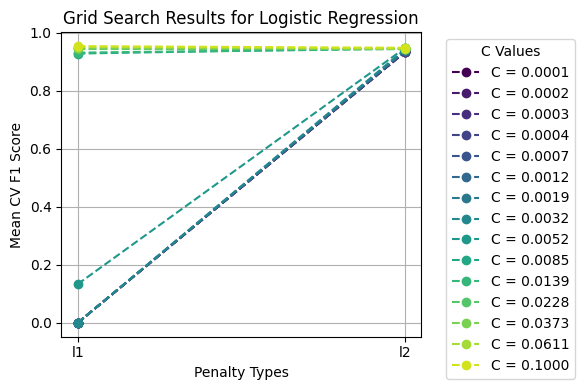

In [293]:
# Plot GridSearch results

# Retrieve the mean test scores
scores = grid.cv_results_['mean_test_score'].reshape(len(C_vector), len(penalty_list))

# Dynamically generate colors using a colormap
cmap = get_cmap('viridis')  
colors = [cmap(i / len(C_vector)) for i in range(len(C_vector))]

# Set up the plot
plt.figure(figsize=(6, 4))

# Loop through C_vector to plot scores for each penalty
for i, C in enumerate(C_vector):
    plt.plot(
        penalty_list, scores[i, :],
        linestyle='--', marker='o',
        color=colors[i],
        label=f'C = {C:.4f}'
    )

# Add legend, labels, and grid
plt.legend(title='C Values', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Penalty Types')
plt.ylabel('Mean CV F1 Score')
plt.title('Grid Search Results for Logistic Regression')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [294]:
# Train the best model
lr_best = LogisticRegression(solver='saga', max_iter=1000, C=best_C, penalty=best_penalty, random_state=42)
lr_best.fit(X_train, y_train)

train_score = lr_best.score(X_train, y_train)
test_score = lr_best.score(X_test, y_test)

print(f"\nTrain accuracy: {train_score}")
print(f"Test accuracy: {test_score}")


Train accuracy: 0.9586206896551724
Test accuracy: 0.8859649122807017


In [295]:
# Print classification report
y_pred = lr_best.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the report in a dict format
report_dict = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        67
           1       0.80      0.96      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.88       114
weighted avg       0.90      0.89      0.89       114



In [296]:
# Log the model and its parameters and scores

mlflow.set_experiment('Breast cancer prediction')
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

with mlflow.start_run(run_name=f'logistic_regression_run_SMOTE') as run:

    mlflow.set_tag('model', 'Logistic Regression')
    mlflow.set_tag('dataset', 'breast_cancer')

    # Log model params
    mlflow.log_params({
        'model_name': 'logistic_regression_smote',
        'C': best_C,
        'penalty': best_penalty,
        'solver': 'saga',
        'max_iter': 1000
    })

    # Log metrics
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.log_metric('roc_auc', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:, 1]))

    mlflow.log_metric('train_acc', train_score)
    mlflow.log_metric('test_acc', test_score)

    # Log model
    mlflow.sklearn.log_model(lr_best, "logistic_regression_model", input_example=X_test[:1])

    # Log confusion matrix
    confusion_path = 'confusion_matrix.txt'
    np.savetxt(confusion_path, confusion)
    mlflow.log_artifact(confusion_path)


🏃 View run logistic_regression_run_SMOTE at: http://127.0.0.1:5000/#/experiments/835005727565071984/runs/07ea614b1bee46fcb213174c290eba00
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/835005727565071984
